# Predicting gender by voice using Machine Learning / Data Analytics

This notebook will explore the data analysis of predicting a gender based on voice features.
**Classification**

## Dataset

The following acoustic properties of each voice are measured and included within the CSV:

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency
3. median: median frequency (in kHz)
4. Q25: first quantile (in kHz)
5. Q75: third quantile (in kHz)
6. IQR: interquantile range (in kHz)
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. peakf: peak frequency (frequency with highest energy)
14. meanfun: average of fundamental frequency measured across acoustic signal
15. minfun: minimum fundamental frequency measured across acoustic signal
16. maxfun: maximum fundamental frequency measured across acoustic signal
17. meandom: average of dominant frequency measured across acoustic signal
18. mindom: minimum of dominant frequency measured across acoustic signal
19. maxdom: maximum of dominant frequency measured across acoustic signal
20. dfrange: range of dominant frequency measured across acoustic signal
21. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
22. label: male or female

## Aim

1. The aim of this project is to find out the best model with the best accuracy, 
2. at the same time reducing unimportant features to maximize computation power.

In [24]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [25]:
# Reading in data

data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [27]:
# Checking for NaN values in dataset

data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [33]:
# Checking for real inbalances in classes
percent_male = data[data.label == 'male'].shape[0] / data.shape[0] * 100
percent_female = data[data.label == 'female'].shape[0] / data.shape[0] * 100
print(f"Number of male samples: {percent_male}%")
print(f"Number of female samples: {percent_female}%")

Number of male samples: 50.0%
Number of female samples: 50.0%


In [34]:
# Since labels are not in numbers and have 2 classes, we split them into 1 and 0
# 0 is female, 1 is male

data.label = [1 if each == 'male' else 0 for each in data.label]
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [36]:
# Splitting data into X and y
# X = features, y = target label

X = data.drop(['label'], axis=1)
y = data['label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [37]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [38]:
# Splitting the data into training and test set of size 0.2

from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
807,0.180360,0.053766,0.189474,0.141895,0.213474,0.071579,1.473165,4.899974,0.918149,0.395065,0.186526,0.180360,0.132277,0.047013,0.279070,0.968568,0.023438,4.148438,4.125000,0.128314
2495,0.185643,0.065043,0.203955,0.186017,0.223454,0.037437,2.732155,11.206323,0.898330,0.476308,0.199666,0.185643,0.175833,0.048241,0.275862,1.077674,0.023438,6.023438,6.000000,0.086686
2529,0.203908,0.045961,0.201869,0.177944,0.239626,0.061682,2.247859,10.481790,0.898687,0.358451,0.177944,0.203908,0.169617,0.047291,0.274286,1.265126,0.023438,8.554688,8.531250,0.084143
2241,0.115789,0.081103,0.102197,0.038124,0.193181,0.155057,1.620439,6.600749,0.962574,0.746873,0.017620,0.115789,0.200910,0.075829,0.258065,0.452257,0.007812,1.578125,1.570312,0.250933
2981,0.179889,0.067810,0.163096,0.137244,0.246925,0.109681,2.106748,8.030296,0.932428,0.551025,0.156253,0.179889,0.136662,0.033898,0.277778,0.963949,0.043945,3.999023,3.955078,0.261785


## Model choices for classification

1. RandomForest - RandomForestClassifier()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. Logistic Regression - LogisticRegression() 
4. Support Vector Classification svc()
5. XGBoost

### 1. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
clf.score(X_train, y_train)

1.0

In [42]:
# Accuracy score for test dataset
clf.score(X_test, y_test)

0.9826498422712934

In [45]:
# Tuning hyperparameters using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
rs_forest_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(rs_forest_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
np.random.seed(42)

rs_forest = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rs_forest_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

rs_forest.fit(X_train, y_train)

print("Done!")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 33.2min finished


Done!


In [48]:
# Getting best parameters for Random Forest

rs_forest.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [49]:
rs_forest.score(X_test, y_test)

0.9826498422712934

In [56]:
# Getting cross validation scores for best parameters
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=600,
                            min_samples_split=5,
                            min_samples_leaf=1,
                            max_features='auto',
                            max_depth=80,
                            bootstrap=True)
            

In [57]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
# Cross-validated accuracy score
cv_acc = np.mean(cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
cv_acc

0.9678054031426135

In [58]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9652328822778214

In [59]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9684462724114523

In [60]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.9671967336920844

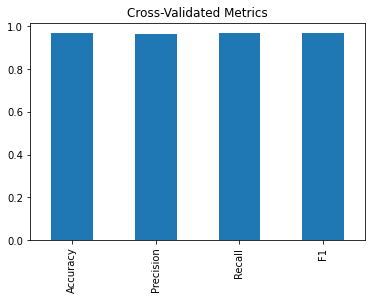

In [61]:
%matplotlib inline

# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Finding feature importance

In [66]:
clf.fit(X_train, y_train)

# Check coef_
clf.feature_importances_[0]

0.018081213140442597

In [67]:
features_dict = dict(zip(data.columns, list(clf.feature_importances_)))
features_dict

{'meanfreq': 0.018081213140442597,
 'sd': 0.07615081382450326,
 'median': 0.010789266662180571,
 'Q25': 0.15186972462716763,
 'Q75': 0.010104553911662343,
 'IQR': 0.19149083070694145,
 'skew': 0.010657208346759223,
 'kurt': 0.008865532496642504,
 'sp.ent': 0.045869277885734375,
 'sfm': 0.032878167137764515,
 'mode': 0.019863068355471775,
 'centroid': 0.01876590724265421,
 'meanfun': 0.35509217934106735,
 'minfun': 0.008130618016704165,
 'maxfun': 0.004547152484095612,
 'meandom': 0.007420546037635233,
 'mindom': 0.006175305387045368,
 'maxdom': 0.008367375047410587,
 'dfrange': 0.008455202017192395,
 'modindx': 0.0064260573309248385}

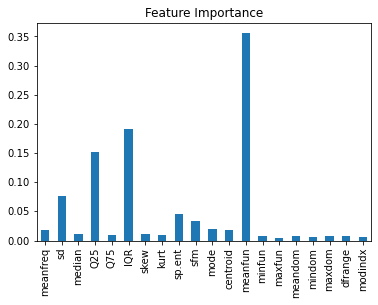

In [68]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

## Moving Forward

1. Do the same for other models and get the best model to use for our current dataset
2. Take feature importance and reduce number of features to get a higher score (?)
3. Create df.coef matrix and plot into seaborn to see how the data correlates with the target for (2)